****
**Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais - Campus Ouro Preto**<br>
**Especialização em Inteligência Artificial**<br>
**Disciplina: Redes Neurais e Aprendizado Profundo**<br>
**Profs.: Dr. Agnaldo José da Rocha Reis**<br>
**Alunos:  Fernando dos Santos Alves Fernandes, Ivanete Fátima de Azevedo e Marco Antônio do Nascimento**
****

1. O que é inteligência para você(s)?

*Entendemos a inteligência como uma combinação de conceitos como a sabedoria, o conhecimento, a transformação da mente e a virtude. Para nós, a sabedoria seria a capacidade de compreensão do indivíduo, dado uma informação transmitida a ele. O conhecimento pode ser visto como a consciência adquirida por meio da experiência, estudo ou introspecção, capacitando uma pessoa a interpretar e agir no mundo. A transformação da mente é a capacidade de uma pessoa de mudar seus pensamentos e perspectivas ao longo do tempo, sendo assim uma busca constante por um entendimento de evolução intelectual. Por fim temos a virtude que é a capacidade do indivíduo em buscar a excelência moral e ética, não apenas a excelência intelectual. Isso posto, a inteligência, para nós, não é apenas uma capacidade intelectual do indivíduo, mas também envolve a busca por virtude e a capacidade de transformação da mente. O conceito de inteligência também pode ser associado à capacidade humana de tomar decisões e resolver problemas; à capacidade de se adaptar a diferentes situações; à capacidade de aprender algo novo, a partir da detecção de padrões.*

2. Em sua opinião (ou na do grupo), o que aconteceria se alguém descobrisse como implementar uma IA mais abrangente (e.g., AGI) em um robô?

*Em algumas tarefas, as máquinas já são capazes de ter um desempenho semelhante ou melhor do que o ser humano, por exemplo, no processamento e análise de dados e imagens. De qualquer forma, os modelos de inteligência artificial atuais são capazes de resolver tarefas específicas. No momento em que for possível o desenvolvimento e implantação de uma IA mais abrangente em um robô, principalmente, se (ou quando) alcançarmos uma AGI (Artificial General Intelligence), para alguns pesquisadores, estaremos diante de um risco à raça humana; para outros, esse é o propósito das pesquisas em Inteligência Artificial. Acreditamos que a implementação de uma IA mais abrangente, como a AGI em robôs, representa uma potencial revolução para a sociedade, podendo causar avanços em diversas esferas, desde a automação industrial até aplicações médicas e pesquisa científica. Dentro da automação industrial, uma AGI poderia otimizar processos em setores variados, elevando eficiência na produção, logística e serviços. Na medicina, os benefícios seriam notáveis, com robôs utilizando IAG para diagnósticos mais precisos, execução de cirurgias complexas e até mesmo fornecimento de suporte emocional a pacientes. Contudo, diversos dilemas éticos podem surgir e demandam reflexões profundas sobre temas como responsabilidade, privacidade e acesso à tecnologia. Além disso, a regulamentação torna-se um ponto que merece atenção, dado que a sociedade deveria estabelecer diretrizes claras para o desenvolvimento e uso responsável da AGI, crucial para assegurar a segurança, transparência e conformidade ética. De todo modo, acreditamos que uma AGI deve ser vista como uma ferramenta para aprimorar capacidades humanas e não uma força substitutiva. Isso posto, precisamos interpretar esse dilema de forma cautelosa e ética, alinhada aos valores fundamentais da sociedade, para garantir que os benefícios da AGI sejam amplamente distribuídos, preservando o bem-estar humano numa era de transformação tecnológica.*

3. A partir da análise de um processo de destilação fracionada de petróleo observou-se que determinado óleo poderia ser classificado em duas classes de pureza {C1 e C2}, mediante a medição de três grandezas {x1, x2 e x3} que representam algumas das propriedades físico-químicas do óleo. Para tanto, pretende-se utilizar um perceptron para executar a classificação automática dessas duas classes. Assim, baseadas nas informações coletadas do processo, formou-se o conjunto de treinamento em anexo1, tomando por convenção o valor –1 para óleo pertencente à classe C1 e o valor +1 para óleo pertencente à classe C2.

Daí, pede-se:

a. Execute dois treinamentos para a rede perceptron, inicializando-se o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, num_features, learning_rate=0.01, epochs=100):
        self.num_features = num_features
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(num_features + 1)  # initial random weights +1 for the bias term
        self.initialWeights = self.weights
        print(f'[INFO] \tRandom initial weights: {self.weights}')

    def predict(self, inputs): # activation function
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0] # activation potential: u
        return 1 if summation >= 0 else -1 # Use of the bipolar step function

    def train(self, training_data, labels):
        hasError = True
        for epoch in range(self.epochs):
            #print(f'[INFO] Epoch: {epoch}')
            hasError = False
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs) # return of activation function: y
                if prediction != label:
                    hasError = True
                    update = self.learning_rate * (label - prediction) # eta * (dk - y)
                    self.weights[1:] += update * inputs # update weights: w <- w + eta * (dk - y) * xk
                    self.weights[0] += update # update activation limiar: tetha <- tetha + eta * (dk - y)
                    #print(f'[INFO] Weights: {self.weights}')
            if hasError == False:
                print(f'[INFO] \tConverged after: {epoch + 1} epochs.')
                break
        print(f'[INFO] \tFinal weights: {self.weights}')
        print(f'[INFO] \tTotal of epochs: {epoch + 1}')
    
    def getInitialWeights(self):
        return self.initialWeights

    def getFinalWeights(self):
        return self.weights

In [2]:
print(f'\n[INFO] ###### Perceptron Implementation #######')
print(f'\n[INFO] Loading training dataset and labels...')
file = open('tab_treinamento1.dat', 'r')
results = list()
l = list()

for line in file:
    columns = line.split()
    columns = np.array(columns, dtype=float)
    results.append(columns[:3])
    l.append(columns[-1:])
    
training_data = np.array(results)
labels = np.array(l)
print(f'\t[INFO] OK!')

#training_data = np.array([[0.6508, 0.1097, 4.0009], [-1.4492, 0.8896, 4.4005], [2.085, 0.6876, 1.2071], [0.2626, 1.1476, 7.7985], [0.6418, 1.0234, 7.0427], [0.2569, 0.673, 8.3265], [1.1155, 0.6043, 7.4446], [0.0914, 0.3399, 7.0677], [0.0121, 0.5256, 4.6316], [-0.0429, 0.466, 5.4323], [0.434, 0.687, 8.2287], [0.2735, 1.0287, 7.1934], [0.4839, 0.4851, 7.485], [0.4089, -0.1267, 5.5019], [1.4391, 0.1614, 8.5843], [-0.9115,  -0.1973, 2.1962], [0.3654, 1.0475, 7.4858], [0.2144, 0.7515, 7.1699], [0.2013, 1.0014, 6.5489], [0.6483, 0.2183, 5.8991], [-0.1147, 0.2242, 7.2435], [-0.797, 0.8795, 3.8762], [-1.0625, 0.6366, 2.4707], [0.5307, 0.1285, 5.6883], [-1.22, 0.7777, 1.7252], [0.3957, 0.1076, 5.6623], [-0.1013, 0.5989, 7.1812], [2.4482, 0.9455, 11.2095], [2.0149, 0.6192, 10.9263], [0.2012, 0.2611, 5.4631]])
#labels = np.array([-1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1])
print(f'\n[INFO] Getting information about training dataset...') 
print(f'[INFO] Training dataset: \n{training_data}')
print(f'[INFO] Labels of training dataset: \n{labels}')


[INFO] ###### Perceptron Implementation #######

[INFO] Loading training dataset and labels...
	[INFO] OK!

[INFO] Getting information about training dataset...
[INFO] Training dataset: 
[[-0.6508  0.1097  4.0009]
 [-1.4492  0.8896  4.4005]
 [ 2.085   0.6876 12.071 ]
 [ 0.2626  1.1476  7.7985]
 [ 0.6418  1.0234  7.0427]
 [ 0.2569  0.673   8.3265]
 [ 1.1155  0.6043  7.4446]
 [ 0.0914  0.3399  7.0677]
 [ 0.0121  0.5256  4.6316]
 [-0.0429  0.466   5.4323]
 [ 0.434   0.687   8.2287]
 [ 0.2735  1.0287  7.1934]
 [ 0.4839  0.4851  7.485 ]
 [ 0.4089 -0.1267  5.5019]
 [ 1.4391  0.1614  8.5843]
 [-0.9115 -0.1973  2.1962]
 [ 0.3654  1.0475  7.4858]
 [ 0.2144  0.7515  7.1699]
 [ 0.2013  1.0014  6.5489]
 [ 0.6483  0.2183  5.8991]
 [-0.1147  0.2242  7.2435]
 [-0.797   0.8795  3.8762]
 [-1.0625  0.6366  2.4707]
 [ 0.5307  0.1285  5.6883]
 [-1.22    0.7777  1.7252]
 [ 0.3957  0.1076  5.6623]
 [-0.1013  0.5989  7.1812]
 [ 2.4482  0.9455 11.2095]
 [ 2.0149  0.6192 10.9263]
 [ 0.2012  0.2611  5.4631]]
[

In [94]:
# Creating a Perceptron
print(f'\n[INFO] Creating a Perceptron...')
number_of_epochs = 10000
perceptron1 = Perceptron(num_features=3, learning_rate=0.01, epochs=number_of_epochs)
print(f'[INFO] \tOK!')


[INFO] Creating a Perceptron...
[INFO] 	Random initial weights: [0.17736342 0.15638614 0.47744044 0.1209934 ]
[INFO] 	OK!


In [95]:
# Training the perceptron 1
print(f'\n[INFO] Getting information about training dataset...')
print(f'[INFO] \tTraining dataset size = {training_data.shape[0]}')
print(f'[INFO] \tLabels size = {labels.shape[0]}')
print(f'[INFO] \tLimit of epochs: {number_of_epochs}')
print(f'\n[INFO] Training the Perceptron 1...')
perceptron1.train(training_data, labels)

initialWeights = perceptron1.getInitialWeights()
finalWeights = perceptron1.getFinalWeights()
print(f'\t[INFO] OK!')


[INFO] Getting information about training dataset...
[INFO] 	Training dataset size = 30
[INFO] 	Labels size = 30
[INFO] 	Limit of epochs: 10000

[INFO] Training the Perceptron 1...
[INFO] 	Converged after: 333 epochs.
[INFO] 	Final weights: [ 2.93736342  1.41135414  2.43657844 -0.7023866 ]
[INFO] 	Total of epochs: 333
	[INFO] OK!


In [96]:
# Creating a new Perceptron
print(f'\n[INFO] Creating a new Perceptron...')
number_of_epochs = 10000
perceptron2 = Perceptron(num_features=3, learning_rate=0.01, epochs=number_of_epochs)
print(f'[INFO] \tOK!')


[INFO] Creating a new Perceptron...
[INFO] 	Random initial weights: [0.44467875 0.60329962 0.69505087 0.33930767]
[INFO] 	OK!


In [97]:
# Training the perceptron 2
print(f'\n[INFO] Getting information about training dataset...')
print(f'[INFO] \tTraining dataset size = {training_data.shape[0]}')
print(f'[INFO] \tLabels size = {labels.shape[0]}')
print(f'[INFO] \tLimit of epochs: {number_of_epochs}')
print(f'\n[INFO] Training the Perceptron 2...')
perceptron2.train(training_data, labels)

print(f'\t[INFO] OK!')


[INFO] Getting information about training dataset...
[INFO] 	Training dataset size = 30
[INFO] 	Labels size = 30
[INFO] 	Limit of epochs: 10000

[INFO] Training the Perceptron 2...
[INFO] 	Converged after: 386 epochs.
[INFO] 	Final weights: [ 3.06467875  1.55732162  2.47131887 -0.73088233]
[INFO] 	Total of epochs: 386
	[INFO] OK!


b. Registre os resultados dos dois treinamentos na tabela a seguir:

Tabela 1 - Resultados dos treinamentos (**tab_treinamento1.dat**):
<table border="1">
	<tr>
		<td rowspan="2">Treinamento</td>
		<td colspan="4">Vetor de Pesos Inicial</td>
		<td colspan="4">Vetor de Pesos Final</td>
		<td rowspan="2"> Número de Épocas</td>
	</tr>
	<tr>
		<td>b</td>
		<td>w1</td>
		<td>w2</td>
		<td>w3</td>
		<td>b</td>
		<td>w1</td>
		<td>w2</td>
		<td>w3</td>
	</tr>
	<tr>
		<td>1º (T1)</td>
		<td>0.1773634</td>
		<td>0.15638614</td>
		<td>0.47744044</td>
		<td>0.1209934</td>
		<td>2.93736342</td>
		<td>1.41135414</td>
		<td>2.43657844</td>
		<td>-0.7023866</td>
		<td>333</td>
	</tr>
	<tr>
		<td>2º (T1)</td>
		<td>0.44467875</td>
		<td>0.15638614</td>
		<td>0.69505087</td>
		<td>0.33930767</td>
		<td>3.06467875</td>
		<td>1.55732162</td>
		<td>2.47131887</td>
		<td>-0.73088233</td>
		<td>386</td>
	</tr>
</table>

*Nota: os valores atuais dessa tabela se referem ao últimos treinamentos realizados. Caso os trechos de código acima sejam executados novamente, necessita-se atualizar a tabela.*

c. Após o treinamento do perceptron, aplique-o na classificação automática de novas amostras de óleo (ver arquivo tab_teste1.dat), indicando-se na tabela seguinte os resultados das saídas (Classes) referentes aos dois processos de treinamento realizados no item a.

In [98]:
# Testing dataset
# test_data = np.array([[0.6508, 0.1097, 4.0009], [-1.4492, 0.8896, 4.4005], [2.085, 0.6876, 1.2071], [0.2626, 1.1476, 7.7985], [0.6418, 1.0234, 7.0427], [0.2569, 0.673, 8.3265], [1.1155, 0.6043, 7.4446], [0.0914, 0.3399, 7.0677], [0.0121, 0.5256, 4.6316], [-0.0429, 0.466, 5.4323], [0.434, 0.687, 8.2287], [0.2735, 1.0287, 7.1934], [0.4839, 0.4851, 7.485], [0.4089, -0.1267, 5.5019], [1.4391, 0.1614, 8.5843], [-0.9115,  -0.1973, 2.1962], [0.3654, 1.0475, 7.4858], [0.2144, 0.7515, 7.1699], [0.2013, 1.0014, 6.5489], [0.6483, 0.2183, 5.8991], [-0.1147, 0.2242, 7.2435], [-0.797, 0.8795, 3.8762], [-1.0625, 0.6366, 2.4707], [0.5307, 0.1285, 5.6883], [-1.22, 0.7777, 1.7252], [0.3957, 0.1076, 5.6623], [-0.1013, 0.5989, 7.1812], [2.4482, 0.9455, 11.2095], [2.0149, 0.6192, 10.9263], [0.2012, 0.2611, 5.4631]])

# Testing the perceptron
print(f'\n[INFO] Loading testing dataset...')
file = open('tab_teste1.dat', 'r')
results = list()

for line in file:
    columns = line.split()
    columns = np.array(columns, dtype=float)
    results.append(columns[:])
    
testing_data = np.array(results)
print(f'\t[INFO] OK!')

print(f'\n[INFO] Getting information about testing dataset...') 
print(f'[INFO] Testing dataset: \n{testing_data}')   
# print(f'[INFO] \tTesting dataset size = {training_data.shape[0]}')
print(f'[INFO] \tTesting dataset size = {testing_data.shape[0]}')


[INFO] Loading testing dataset...
	[INFO] OK!

[INFO] Getting information about testing dataset...
[INFO] Testing dataset: 
[[-0.3565  0.062   5.9891]
 [-0.7842  1.1267  5.5912]
 [ 0.3012  0.5611  5.8234]
 [ 0.7757  1.0648  8.0677]
 [ 0.157   0.8028  6.304 ]
 [-0.7014  1.0316  3.6005]
 [ 0.3748  0.1536  6.1537]
 [-0.692   0.9404  4.4058]
 [-1.397   0.7141  4.9263]
 [-1.8842 -0.2805  1.2548]]
[INFO] 	Testing dataset size = 10


In [99]:
print(f'\n[INFO] Running testing data with Perceptron 1...')
# for inputs in training_data:
for inputs in testing_data:
    result = perceptron1.predict(inputs)
    print(f"[INFO] \tInput: {inputs} -> Output: {result}")


[INFO] Running testing data with Perceptron 1...
[INFO] 	Input: [-0.3565  0.062   5.9891] -> Output: -1
[INFO] 	Input: [-0.7842  1.1267  5.5912] -> Output: 1
[INFO] 	Input: [0.3012 0.5611 5.8234] -> Output: 1
[INFO] 	Input: [0.7757 1.0648 8.0677] -> Output: 1
[INFO] 	Input: [0.157  0.8028 6.304 ] -> Output: 1
[INFO] 	Input: [-0.7014  1.0316  3.6005] -> Output: 1
[INFO] 	Input: [0.3748 0.1536 6.1537] -> Output: -1
[INFO] 	Input: [-0.692   0.9404  4.4058] -> Output: 1
[INFO] 	Input: [-1.397   0.7141  4.9263] -> Output: -1
[INFO] 	Input: [-1.8842 -0.2805  1.2548] -> Output: -1


In [100]:
print(f'\n[INFO] Running testing data with Perceptron 2...')
# for inputs in training_data:
for inputs in testing_data:
    result = perceptron2.predict(inputs)
    print(f"[INFO] \tInput: {inputs} -> Output: {result}")


[INFO] Running testing data with Perceptron 2...
[INFO] 	Input: [-0.3565  0.062   5.9891] -> Output: -1
[INFO] 	Input: [-0.7842  1.1267  5.5912] -> Output: 1
[INFO] 	Input: [0.3012 0.5611 5.8234] -> Output: 1
[INFO] 	Input: [0.7757 1.0648 8.0677] -> Output: 1
[INFO] 	Input: [0.157  0.8028 6.304 ] -> Output: 1
[INFO] 	Input: [-0.7014  1.0316  3.6005] -> Output: 1
[INFO] 	Input: [0.3748 0.1536 6.1537] -> Output: -1
[INFO] 	Input: [-0.692   0.9404  4.4058] -> Output: 1
[INFO] 	Input: [-1.397   0.7141  4.9263] -> Output: -1
[INFO] 	Input: [-1.8842 -0.2805  1.2548] -> Output: -1


Tabela 2 - Resultados com as saídas das saída (classes) para os dados de teste (**tab_teste1.dat**):

<table border="1">
	<tr>
		<td>Amostra</td>
		<td>x1</td>
		<td>x2</td>
		<td>x3</td>
		<td>y (T1)</td>
		<td>y (T2)</td>        
	</tr>
	<tr>
		<td>1</td>
		<td>-0.3565</td>
		<td>0.0620</td>
		<td>5.9891</td>
		<td>-1</td>
		<td>-1</td>
	</tr>
	<tr>
		<td>2</td>
		<td>-0.7842</td>
		<td>1.1267</td>
		<td>5.5912</td>
		<td>1</td>
		<td>1</td>
	</tr>
	<tr>
		<td>3</td>
		<td>0.3012</td>
		<td>0.5611</td>
		<td>5.8234</td>
		<td>1</td>
		<td>1</td>
	</tr>
	<tr>
		<td>4</td>
		<td>0.7757</td>
		<td>1.0648</td>
		<td>8.0677</td>
		<td>1</td>
		<td>1</td>
	</tr>
	<tr>
		<td>5</td>
		<td>0.157</td>
		<td>0.8028</td>
		<td>6.304</td>
		<td>1</td>
		<td>1</td>
	</tr>
	<tr>
		<td>6</td>
		<td>-0.7014</td>
		<td>1.0316</td>
		<td>3.6005</td>
		<td>1</td>
		<td>1</td>
	</tr>            
	<tr>
		<td>7</td>
		<td>0.3748</td>
		<td>0.1536</td>
		<td>6.1537</td>
		<td>-1</td>
		<td>-1</td>
	</tr>
	<tr>
		<td>8</td>
		<td>-0.692</td>
		<td>0.9404</td>
		<td>4.4058</td>
		<td>1</td>
		<td>1</td>
	</tr>
	<tr>
		<td>9</td>
		<td>-1.397</td>
		<td>0.7141</td>
		<td>4.9263</td>
		<td>-1</td>
		<td>-1</td>
	</tr>
	<tr>
		<td>10</td>
		<td>-1.8842</td>
		<td>-0.2805</td>
		<td>1.2548</td>
		<td>-1</td>
		<td>-1</td>
	</tr>                
</table>

*Nota: os valores atuais dessa tabela se referem ao últimos testes realizados. Caso os trechos de código acima sejam executados novamente, necessita-se atualizar a tabela.*

d. Explique por que o número de épocas de treinamento varia a cada vez que se executa o treinamento do perceptron.

*O número de épocas necessárias para a convergência do processo de treinamento varia conforme os valores iniciais dos pesos e do limiar de ativação. Esses valores iniciais definem quão longe da fronteira de seperação o treinamento inicia o ajuste do modelo. Se os valores iniciais atribuídos aos pesos e ao limiar de ativação são definidos aleatoriamente, a cada execução do treinamento, o número de épocas para a convergência normalmente é diferente.*

e. Qual é a principal limitação do perceptron quando aplicado em problemas de classificação de padrões?

*Os perceptrons são um tipo de rede neurais apropriada para tarefa de classificação de padrões em que as classes são linearmente separáveis. Por isso, para problemas não linearmente separáveis utilizando perceptrons, é necessário especificar um número máximo de épocas de treinamento.*

4. Um sistema de gerenciamento automático de controle de duas válvulas, situado a 500 metros de um processo industrial, envia um sinal codificado constituído de quatro grandezas {x1, x2, x3 e x4} que são necessárias para o ajuste de cada uma das válvulas. Conforme mostra a figura abaixo, a mesma via de comunicação é utilizada para acionamento de ambas as válvulas, sendo que o  comutador localizado próximo das válvulas deve decidir se o sinal é para a válvula A ou B. Porém, durante a transmissão, os sinais sofrem interferências que alteram o conteúdo das informações transmitidas. Para resolver este problema, treinar-se-á uma rede ADALINE para classificar os sinais ruidosos, que informará ao sistema comutador se os dados devem ser encaminhados para o comando de ajuste da válvula A ou B. Assim, baseado nas medições dos sinais já com ruídos, formou-se o conjunto de treinamento em anexo2, tomando por convenção o valor –1 para os sinais que devem ser encaminhados para o ajuste da válvula A e o valor +1 se os mesmos devem ser enviados para a válvula B.

Daí, pede-se:

a. Execute 2 treinamentos para a rede ADALINE inicializando o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.

In [3]:
import numpy as np

class Adaline:
    def __init__(self, num_features, learning_rate=0.01, epochs=100, epsilon=1e-5):
        self.num_features = num_features
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.epsilon = epsilon
        self.weights = np.random.rand(num_features + 1)  # initial random weights +1 for the bias term
        print(f'[INFO] \tRandom initial weights: {self.weights}')

    def predict(self, inputs): # activation function
        activation = np.dot(inputs, self.weights[1:]) + self.weights[0] # activation potential: u
        return 1 if activation >= 0 else -1  # Use of the bipolar step function

    def train(self, training_data, targets):
        mse = 0
        for epoch in range(self.epochs):
            total_error = 0
            #print(f'[INFO] Epoch: {epoch}')
            for inputs, target in zip(training_data, targets):
                activation = self.predict(inputs) # return of activation function: y
                error = target - activation
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
                total_error += error ** 2
            mse = total_error / len(targets)
            if mse < self.epsilon:
                print(f'[INFO] \tConverged after: {epoch + 1} epochs.')
                break
        print(f'[INFO] \tFinal weights: {self.weights}') 
        print(f'[INFO] \tTotal of epochs: {epoch + 1}')
        print(f'[INFO] \tMean square error: {mse}')

In [4]:
print(f'\n[INFO] ###### Adaline Implementation #######')
print(f'\n[INFO] Loading training dataset and targets...')
file = open('tab_treinamento2.dat', 'r')
results = list()
t = list()

for line in file:
    columns = line.split()
    columns = np.array(columns, dtype=float)
    results.append(columns[:4])
    t.append(columns[-1:])
    
training_data = np.array(results)
targets = np.array(t)
print(f'[INFO] \tOK!')

#training_data = np.array([[4.3290000e-01, -1.3719000e+00, 7.0220000e-01, -8.5350000e-01],[3.0240000e-01, 2.2860000e-01, 8.6300000e-01, 2.7909000e+00],[1.3490000e-01, -6.4450000e-01, 1.0530000e+00, 5.6870000e-01],[3.3740000e-01, -1.7163000e+00, 3.6700000e-01, -6.2830000e-01],[1.1434000e+00, -4.8500000e-02, 6.6370000e-01, 1.2606000e+00],[1.3749000e+00, -5.0710000e-01, 4.4640000e-01, 1.3009000e+00],[7.2210000e-01, -7.5870000e-01, 7.6810000e-01, -5.5920000e-01],[4.4030000e-01, -8.0720000e-01, 5.1540000e-01, -3.1290000e-01],[-5.2310000e-01, 3.5480000e-01, 2.5380000e-01, 1.5776000e+00],[3.2550000e-01, -2.0000000e+00, 7.1120000e-01  -1.1209000e+00],[5.8240000e-01, 1.3915000e+00, -2.2910000e-01, 4.1735000e+00],[1.3400000e-01, 6.0810000e-01, 4.4500000e-01, 3.2230000e+00],[1.4800000e-01, -2.9880000e-01, 4.7780000e-01, 8.6490000e-01],[7.3590000e-01, 1.8690000e-01, -8.7200000e-02, 2.3584000e+00],[7.1150000e-01, -1.1469000e+00, 3.3940000e-01, 9.5730000e-01],[8.2510000e-01, -1.2840000e+00, 8.4520000e-01, 1.2382000e+00],[1.5690000e-01, 3.7120000e-01, 8.8250000e-01, 1.7633000e+00],[3.3000000e-03, 6.8350000e-01, 5.3890000e-01, 2.8249000e+00],[4.2430000e-01, 8.3130000e-01, 2.6340000e-01, 3.5855000e+00],[1.0490000e+00, 1.3260000e-01, 9.1380000e-01, 1.9792000e+00],[1.4276000e+00, 5.3310000e-01, -1.4500000e-02, 3.7286000e+00],[5.9710000e-01, 1.4865000e+00, 2.9040000e-01, 4.6069000e+00],[8.4750000e-01, 2.1479000e+00, 3.1790000e-01, 5.8235000e+00],[1.3967000e+00, -4.1710000e-01, 6.4430000e-01, 1.3927000e+00],[4.4000000e-03, 1.5378000e+00, 6.0990000e-01, 4.7755000e+00],[2.2010000e-01, -5.6680000e-01, 5.1500000e-02, 7.8290000e-01],[6.3000000e-01, -1.2480000e+00, 8.5910000e-01, 8.0930000e-01],[-2.4790000e-01, 8.9600000e-01, 5.4700000e-02, 1.7381000e+00],[-3.0880000e-01, -9.2900000e-02, 8.6590000e-01, 1.5483000e+00],[-5.1800000e-01, 1.4974000e+00, 5.4530000e-01, 2.3993000e+00],[6.8330000e-01, 8.2660000e-01, 8.2900000e-02, 2.8864000e+00],[4.3530000e-01, -1.4066000e+00, 4.2070000e-01, -4.8790000e-01],[-1.0690000e-01, -3.2329000e+00, 1.8560000e-01, -2.4572000e+00],[4.6620000e-01, 6.2610000e-01, 7.3040000e-01, 3.4370000e+00], [8.2980000e-01, -1.4089000e+00, 3.1190000e-01, 1.3235000e+00]])
# targets = np.array([1.0000000e+00, -1.0000000e+00, -1.0000000e+00, -1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00, -1.0000000e+00, 1.0000000e+00, -1.0000000e+00, -1.0000000e+00, 1.0000000e+00, 1.0000000e+00, -1.0000000e+00, -1.0000000e+00, 1.0000000e+00, -1.0000000e+00, -1.0000000e+00, 1.0000000e+00, 1.0000000e+00, -1.0000000e+00, -1.0000000e+00, 1.0000000e+00, -1.0000000e+00, 1.0000000e+00, -1.0000000e+00, 1.0000000e+00, -1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00, -1.0000000e+00, -1.0000000e+00, -1.0000000e+00])
print(f'[INFO] \tTraining dataset: \n{training_data}')
print(f'[INFO] \tTargets of training dataset: \n{targets}')


[INFO] ###### Adaline Implementation #######

[INFO] Loading training dataset and targets...
[INFO] 	OK!
[INFO] 	Training dataset: 
[[ 4.3290e-01 -1.3719e+00  7.0220e-01 -8.5350e-01]
 [ 3.0240e-01  2.2860e-01  8.6300e-01  2.7909e+00]
 [ 1.3490e-01 -6.4450e-01  1.0530e+00  5.6870e-01]
 [ 3.3740e-01 -1.7163e+00  3.6700e-01 -6.2830e-01]
 [ 1.1434e+00 -4.8500e-02  6.6370e-01  1.2606e+00]
 [ 1.3749e+00 -5.0710e-01  4.4640e-01  1.3009e+00]
 [ 7.2210e-01 -7.5870e-01  7.6810e-01 -5.5920e-01]
 [ 4.4030e-01 -8.0720e-01  5.1540e-01 -3.1290e-01]
 [-5.2310e-01  3.5480e-01  2.5380e-01  1.5776e+00]
 [ 3.2550e-01 -2.0000e+00  7.1120e-01 -1.1209e+00]
 [ 5.8240e-01  1.3915e+00 -2.2910e-01  4.1735e+00]
 [ 1.3400e-01  6.0810e-01  4.4500e-01  3.2230e+00]
 [ 1.4800e-01 -2.9880e-01  4.7780e-01  8.6490e-01]
 [ 7.3590e-01  1.8690e-01 -8.7200e-02  2.3584e+00]
 [ 7.1150e-01 -1.1469e+00  3.3940e-01  9.5730e-01]
 [ 8.2510e-01 -1.2840e+00  8.4520e-01  1.2382e+00]
 [ 1.5690e-01  3.7120e-01  8.8250e-01  1.7633e+00]


In [5]:
# Creating an Adaline
print(f'\n[INFO] Creating an Adaline...')
number_of_epochs = 10000
epsilon = 1e-5
adaline1 = Adaline(num_features=4, learning_rate=0.01, epochs=number_of_epochs, epsilon=epsilon)
print(f'[INFO] \tOK!')    


[INFO] Creating an Adaline...
[INFO] 	Random initial weights: [0.85687093 0.02633478 0.96817149 0.24457783 0.34848885]
[INFO] 	OK!


In [6]:
# Training the Adaline
print(f'\n[INFO] Getting information about training dataset...')
print(f'[INFO] \tTraining dataset size = {training_data.shape[0]} {training_data.shape[1]}')
print(f'[INFO] \tLabels size = {targets.shape[0]} {targets.shape[1]}')
print(f'[INFO] \tLimit of epochs: {number_of_epochs}')
print(f'[INFO] \tEpsilon: {epsilon}')
print(f'\n[INFO] Training the Adaline 1...')
adaline1.train(training_data, targets)
print(f'[INFO] \tOK!')


[INFO] Getting information about training dataset...
[INFO] 	Training dataset size = 35 4
[INFO] 	Labels size = 35 1
[INFO] 	Limit of epochs: 10000
[INFO] 	Epsilon: 1e-05

[INFO] Training the Adaline 1...
[INFO] 	Converged after: 39 epochs.
[INFO] 	Final weights: [ 0.61687093  0.54973078  0.61733949 -0.08346417 -0.44539315]
[INFO] 	Total of epochs: 39
[INFO] 	Mean square error: [0.]
[INFO] 	OK!


In [7]:
# Creating an Adaline
print(f'\n[INFO] Creating an new Adaline...')
number_of_epochs = 10000
epsilon = 1e-5
adaline2 = Adaline(num_features=4, learning_rate=0.01, epochs=number_of_epochs, epsilon=epsilon)
print(f'[INFO] \tOK!')    


[INFO] Creating an new Adaline...
[INFO] 	Random initial weights: [0.73993445 0.71783308 0.88046206 0.71642348 0.55246439]
[INFO] 	OK!


In [8]:
# Training the Adaline
print(f'\n[INFO] Getting information about training dataset...')
print(f'[INFO] \tTraining dataset size = {training_data.shape[0]} {training_data.shape[1]}')
print(f'[INFO] \tLabels size = {targets.shape[0]} {targets.shape[1]}')
print(f'[INFO] \tLimit of epochs: {number_of_epochs}')
print(f'[INFO] \tEpsilon: {epsilon}')
print(f'\n[INFO] Training the Adaline 2...')
adaline2.train(training_data, targets)
print(f'[INFO] \tOK!')


[INFO] Getting information about training dataset...
[INFO] 	Training dataset size = 35 4
[INFO] 	Labels size = 35 1
[INFO] 	Limit of epochs: 10000
[INFO] 	Epsilon: 1e-05

[INFO] Training the Adaline 2...
[INFO] 	Converged after: 62 epochs.
[INFO] 	Final weights: [ 0.63993445  0.64771308  0.67042606 -0.07245452 -0.49953761]
[INFO] 	Total of epochs: 62
[INFO] 	Mean square error: [0.]
[INFO] 	OK!


b. Registre os resultados dos dois treinamentos na tabela a seguir:

Tabela 3 - Resultados dos treinamentos (**tab_treinamento2.dat**):
<table border="1">
	<tr>
		<td rowspan="2">Treinamento</td>
		<td colspan="5">Vetor de Pesos Inicial</td>
		<td colspan="5">Vetor de Pesos Final</td>
		<td rowspan="2"> Número de Épocas</td>
	</tr>
	<tr>
		<td>b</td>
		<td>w1</td>
		<td>w2</td>
		<td>w3</td>
        <td>w4</td>
		<td>b</td>
		<td>w1</td>
		<td>w2</td>
		<td>w3</td>
		<td>w4</td>        
	</tr>
	<tr>
		<td>1º (T1)</td>
		<td>0.85687093</td>
		<td>0.02633478</td>
		<td>0.96817149</td>
		<td>0.24457783</td>
        <td>0.34848885</td>
		<td>0.61687093</td>
		<td>0.54973078</td>
		<td>0.61733949</td>
		<td>-0.08346417</td>
        <td>-0.44539315</td>
		<td>39</td>
	</tr>
	<tr>
		<td>2º (T1)</td>
		<td>0.73993445</td>
		<td>0.71783308</td>
		<td>0.88046206</td>
		<td>0.71642348</td>
        <td>0.55246439</td>
		<td>0.63993445</td>
		<td>0.64771308</td>
		<td>0.67042606</td>
		<td>-0.07245452</td>
        <td>-0.49953761</td>
		<td>62</td>
	</tr>
</table>

*Nota: os valores atuais dessa tabela se referem ao últimos treinamentos realizados. Caso os trechos de código acima sejam executados novamente, necessita-se atualizar a tabela.*

c. Para os treinamentos realizados, aplique então a rede ADALINE para classificar e informar ao comutador se os sinais seguintes devem ser encaminhados para a válvula A ou B (ver tab_teste2.dat).

In [9]:
# # Testing the adaline
print(f'\n[INFO] Loading testing dataset...')
file = open('tab_teste2.dat', 'r')
results = list()

for line in file:
    columns = line.split()
    columns = np.array(columns, dtype=float)
    results.append(columns[:])
    
testing_data = np.array(results)
print(f'\t[INFO] OK!')

print(f'\n[INFO] Getting information about testing dataset...')
# print(f'[INFO] Testing dataset size = {training_data.shape[0]}')
print(f'[INFO] \tTesting dataset size = {testing_data.shape[0]}')


[INFO] Loading testing dataset...
	[INFO] OK!

[INFO] Getting information about testing dataset...
[INFO] 	Testing dataset size = 15


In [10]:
print(f'\n[INFO] Running testing data with Adaline 1...')
# for inputs in training_data:
for inputs in testing_data:
    result = adaline1.predict(inputs)
    print(f"[INFO] \tInput: {inputs} -> Output: {result}")


[INFO] Running testing data with Adaline 1...
[INFO] 	Input: [0.9694 0.6909 0.4334 3.4965] -> Output: -1
[INFO] 	Input: [0.5427 1.3832 0.639  4.0352] -> Output: -1
[INFO] 	Input: [ 0.6081 -0.9196  0.5925  0.1016] -> Output: 1
[INFO] 	Input: [-0.1618  0.4694  0.203   3.0117] -> Output: -1
[INFO] 	Input: [ 0.187  -0.2578  0.6124  1.7749] -> Output: -1
[INFO] 	Input: [ 0.4891 -0.5276  0.4378  0.6439] -> Output: 1
[INFO] 	Input: [0.3777 2.0149 0.7423 3.3932] -> Output: 1
[INFO] 	Input: [ 1.1498 -0.4067  0.2469  1.5866] -> Output: 1
[INFO] 	Input: [0.9325 1.095  1.0359 3.3591] -> Output: 1
[INFO] 	Input: [0.506  1.3317 0.9222 3.7174] -> Output: -1
[INFO] 	Input: [ 0.0497 -2.0656  0.6124 -0.6585] -> Output: -1
[INFO] 	Input: [0.4004 3.5369 0.9766 5.3532] -> Output: 1
[INFO] 	Input: [-0.1874  1.3343  0.5374  3.2189] -> Output: -1
[INFO] 	Input: [0.506  1.3317 0.9222 3.7174] -> Output: -1
[INFO] 	Input: [ 1.6375 -0.7911  0.7537  0.5515] -> Output: 1


In [11]:
print(f'\n[INFO] Running testing data with Adaline 2...')
# for inputs in training_data:
for inputs in testing_data:
    result = adaline2.predict(inputs)
    print(f"[INFO] \tInput: {inputs} -> Output: {result}")


[INFO] Running testing data with Adaline 2...
[INFO] 	Input: [0.9694 0.6909 0.4334 3.4965] -> Output: -1
[INFO] 	Input: [0.5427 1.3832 0.639  4.0352] -> Output: -1
[INFO] 	Input: [ 0.6081 -0.9196  0.5925  0.1016] -> Output: 1
[INFO] 	Input: [-0.1618  0.4694  0.203   3.0117] -> Output: -1
[INFO] 	Input: [ 0.187  -0.2578  0.6124  1.7749] -> Output: -1
[INFO] 	Input: [ 0.4891 -0.5276  0.4378  0.6439] -> Output: 1
[INFO] 	Input: [0.3777 2.0149 0.7423 3.3932] -> Output: 1
[INFO] 	Input: [ 1.1498 -0.4067  0.2469  1.5866] -> Output: 1
[INFO] 	Input: [0.9325 1.095  1.0359 3.3591] -> Output: 1
[INFO] 	Input: [0.506  1.3317 0.9222 3.7174] -> Output: -1
[INFO] 	Input: [ 0.0497 -2.0656  0.6124 -0.6585] -> Output: -1
[INFO] 	Input: [0.4004 3.5369 0.9766 5.3532] -> Output: 1
[INFO] 	Input: [-0.1874  1.3343  0.5374  3.2189] -> Output: -1
[INFO] 	Input: [0.506  1.3317 0.9222 3.7174] -> Output: -1
[INFO] 	Input: [ 1.6375 -0.7911  0.7537  0.5515] -> Output: 1


Tabela 4 - Resultados com as saídas das saída (classes) para os dados de teste (**tab_teste2.dat**):

<table border="1">
	<tr>
		<td>Amostra</td>
		<td>x1</td>
		<td>x2</td>
		<td>x3</td>
        <td>x4</td>
		<td>y (T1)</td>
		<td>y (T2)</td>        
	</tr>
	<tr>
		<td>1</td>
		<td>0.9694</td>
		<td>0.6909</td>
		<td>0.4334</td>
        <td>3.4965</td>
		<td>-1</td>
		<td>-1</td>
	</tr>
	<tr>
		<td>2</td>
		<td>0.5427</td>
		<td>1.3832</td>
		<td>0.639</td>
		<td>4.0352</td>
		<td>-1</td>
        <td>-1</td>
	</tr>
	<tr>
		<td>3</td>
		<td>0.6081</td>
		<td>-0.9196</td>
		<td>0.5925</td>
		<td>0.1016</td>
		<td>1</td>
        <td>1</td>
    </tr>
	<tr>
		<td>4</td>
		<td>-0.1618</td>
		<td>0.4694</td>
		<td>0.203</td>
		<td>3.0117</td>
		<td>-1</td>
        <td>-1</td>
    </tr>
	<tr>
		<td>5</td>
		<td>0.187</td>
		<td>-0.2578</td>
		<td>0.6124</td>
		<td>1.7749</td>
		<td>-1</td>
        <td>-1</td>
    </tr>
	<tr>
		<td>6</td>
		<td>0.4891</td>
		<td>-0.5276</td>
		<td>0.4378</td>
		<td>0.6439</td>
		<td>1</td>
        <td>1</td>
    </tr>
	<tr>
		<td>7</td>
		<td>0.3777</td>
		<td>2.0149</td>
		<td>0.7423</td>
		<td>3.3932</td>
		<td>1</td>
        <td>1</td>
    </tr>
	<tr>
		<td>8</td>
		<td>1.1498</td>
		<td>-0.4067</td>
		<td>0.2469</td>
		<td>1.5866</td>
		<td>1</td>
        <td>1</td>
    </tr>
	<tr>
		<td>9</td>
		<td>0.9325</td>
		<td>1.095</td>
		<td>1.0359</td>
		<td>3.3591</td>
		<td>1</td>
        <td>1</td>
    </tr>
	<tr>
		<td>10</td>
		<td>0.506</td>
		<td>1.3317</td>
		<td>0.9222</td>
		<td>3.7174</td>
		<td>-1</td>
        <td>-1</td>
    </tr>
	<tr>
		<td>11</td>
		<td>0.0497</td>
		<td>-2.0656</td>
		<td>0.6124</td>
		<td>-0.6585</td>
		<td>-1</td>
        <td>-1</td>
    </tr> 
	<tr>
		<td>12</td>
		<td>0.4004</td>
		<td>3.5369</td>
		<td>0.9766</td>
		<td>5.3532</td>
		<td>1</td>
        <td>1</td>
    </tr>
	<tr>
		<td>13</td>
		<td>-0.1874</td>
		<td>1.3343</td>
		<td>0.5374</td>
		<td>3.2189</td>
		<td>-1</td>
        <td>-1</td>
    </tr>
	<tr>
		<td>14</td>
		<td>0.506</td>
		<td>1.3317</td>
		<td>0.9222</td>
		<td>3.7174</td>
		<td>-1</td>
        <td>-1</td>
    </tr>
	<tr>
		<td>15</td>
		<td>1.6375</td>
		<td>-0.7911</td>
		<td>0.7537</td>
		<td>0.5515</td>
		<td>1</td>
        <td>1</td>
    </tr> 					
</table>

*Nota: os valores atuais dessa tabela se referem ao últimos testes realizados. Caso os trechos de código acima sejam executados novamente, necessita-se atualizar a tabela.*

5. Um(a) estudante da disciplina de Redes Neurais e Aprendizado Profundo ficou empolgado(a) com o trabalho do Fisher sobre as flores Íris e resolveu propor uma versão automatizada para ele. Essa nova versão deveria ter dois módulos principais: um módulo de visão computacional e um módulo do tipo classificador neural. Caso você(s) fosse(m) esse(a) estudante, como você(s) desenvolveria(m) esse sistema? Descreva-o em detalhes. Use ilustração(ões) para valorizar o seu pré-projeto. Lembre-se que são três tipos de Íris (Virginica, Versicolor e Setosa) e que 4 parâmetros foram medidos pelo Fisher para cada uma das flores (comprimento e largura da Pétala, Comprimento e largura da Sépala).

*Exemplo de código Python para implementar o sistema automatizado de classificação de flores Íris usando visão computacional e um classificador neural. Neste exemplo, usaremos a biblioteca TensorFlow para criar a rede neural. Certifique-se de ter o TensorFlow instalado em seu ambiente antes de executar o código. Você também precisará de outras bibliotecas como NumPy e scikit-learn. Você pode instalá-los usando o pip, se ainda não estiverem instalados:*

In [3]:
!pip install numpy scikit-learn tensorflow

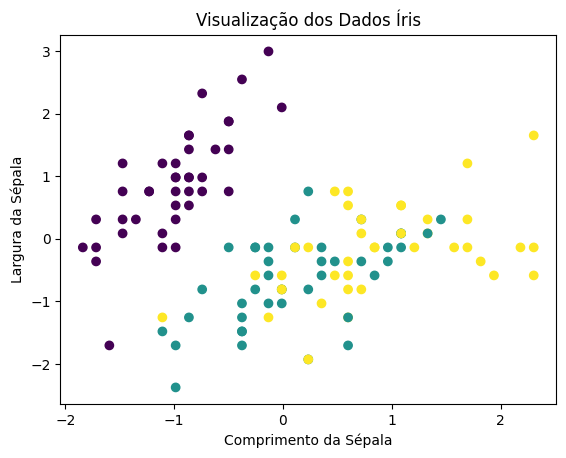

Epoch 1/100
8/8 - 2s - loss: 1.0850 - accuracy: 0.2833 - 2s/epoch - 196ms/step
Epoch 2/100
8/8 - 0s - loss: 0.9450 - accuracy: 0.6583 - 15ms/epoch - 2ms/step
Epoch 3/100
8/8 - 0s - loss: 0.8243 - accuracy: 0.7917 - 16ms/epoch - 2ms/step
Epoch 4/100
8/8 - 0s - loss: 0.7219 - accuracy: 0.8083 - 13ms/epoch - 2ms/step
Epoch 5/100
8/8 - 0s - loss: 0.6329 - accuracy: 0.8083 - 14ms/epoch - 2ms/step
Epoch 6/100
8/8 - 0s - loss: 0.5588 - accuracy: 0.8167 - 12ms/epoch - 2ms/step
Epoch 7/100
8/8 - 0s - loss: 0.4987 - accuracy: 0.8167 - 22ms/epoch - 3ms/step
Epoch 8/100
8/8 - 0s - loss: 0.4504 - accuracy: 0.8333 - 21ms/epoch - 3ms/step
Epoch 9/100
8/8 - 0s - loss: 0.4110 - accuracy: 0.8417 - 15ms/epoch - 2ms/step
Epoch 10/100
8/8 - 0s - loss: 0.3779 - accuracy: 0.8500 - 16ms/epoch - 2ms/step
Epoch 11/100
8/8 - 0s - loss: 0.3523 - accuracy: 0.8500 - 18ms/epoch - 2ms/step
Epoch 12/100
8/8 - 0s - loss: 0.3287 - accuracy: 0.8750 - 18ms/epoch - 2ms/step
Epoch 13/100
8/8 - 0s - loss: 0.3086 - accuracy: 

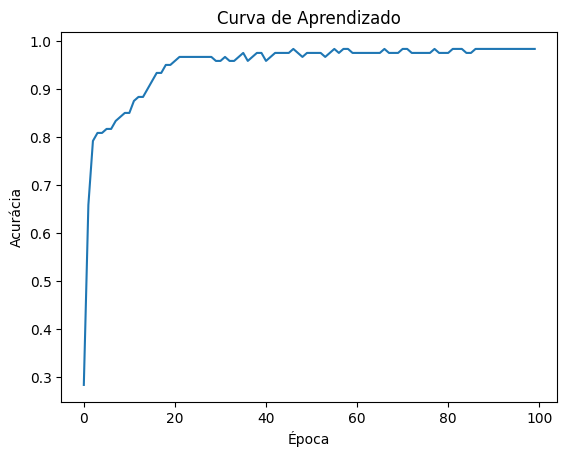

1/1 - 0s - loss: 0.0216 - accuracy: 1.0000 - 178ms/epoch - 178ms/step
Acurácia no conjunto de teste: 100.00%
1/1 [==============================] - 0s 101ms/step
A flor pertence à classe: Setosa
1/1 [==============================] - 0s 33ms/step


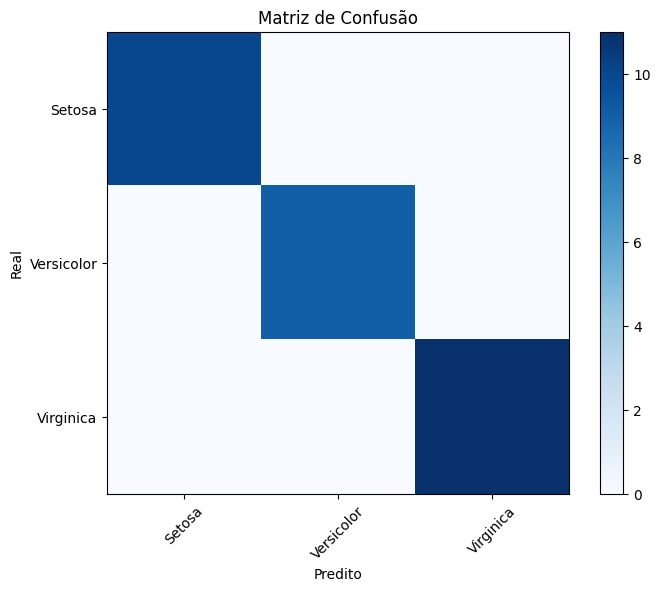

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



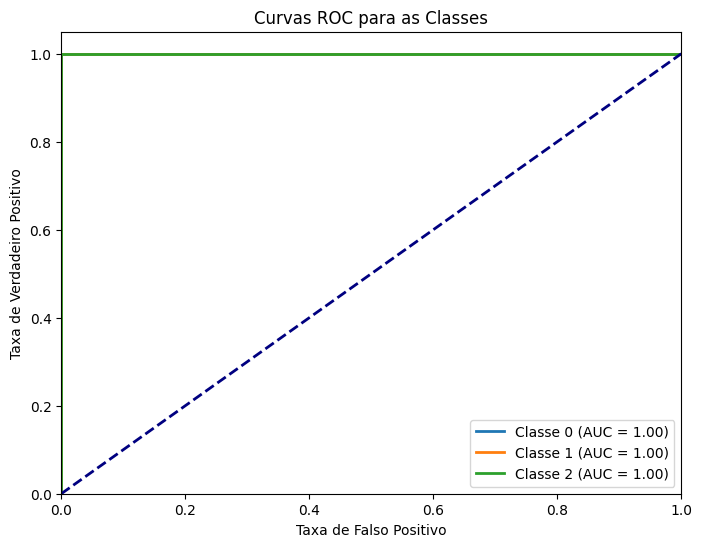

In [4]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Passo 1: Carregar e preparar o conjunto de dados
iris = datasets.load_iris()
X = iris.data  # Parâmetros de entrada
y = iris.target  # Rótulos das classes

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados (importante para redes neurais)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualização dos dados - Gráfico de dispersão 2D
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Visualização dos Dados Íris')
plt.show()

# Passo 2: Criar o modelo de rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Passo 3: Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

# Visualizar a curva de aprendizado
plt.plot(history.history['accuracy'])
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Curva de Aprendizado')
plt.show()

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

# Realizar uma previsão
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Exemplo de parâmetros de uma flor Íris
sample = scaler.transform(sample)  # Padronizar os dados
predicted_class = np.argmax(model.predict(sample))
classes = ['Setosa', 'Versicolor', 'Virginica']
print(f'A flor pertence à classe: {classes[predicted_class]}')

# Matriz de Confusão
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Relatório de Classificação
print(classification_report(y_test, y_pred_classes, target_names=classes))

# Curvas ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Visualizar as curvas ROC
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curvas ROC para as Classes')
plt.legend(loc='lower right')
plt.show()

6. Considere a base de dados encontrada em Irisdat.xlsx. Daí, pede-se: a) Treinar um PMC que classifique observações de flores íris em 3 espécies (Setosa, Versicolor e Virginica) usando como entradas as características SEPALLENGTH (SL), SEPALWIDTH (SW), PETALLENGTH (PL) e PETALWIDTH (PW). b) Estime SL a partir de SW, PL, PW.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
import os

#print(os.getcwd())

# current_directory = os.path.dirname(os.path.abspath(__file__))
# os.path.abspath('')
# file_path = os.path.join(current_directory, "Irisdat.xlsx")
file_path = os.path.abspath("Irisdat.xlsx")
data = pd.read_excel(file_path)

# # Carregar os dados do arquivo Excel
# data = pd.read_excel("Irisdat.xls")

# # Exibir as primeiras linhas do conjunto de dados para compreendê-lo
print(data.head())

# Separar as características (entradas) e os rótulos (espécies)
X = data[["SL", "SW", "PL", "PW"]]
y = data["Species"]

# Dividir os dados em conjuntos de treinamento e teste (80% para treinamento, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados (média 0, desvio padrão 1) usando o StandardScaler original
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar um Perceptron Multicamadas (PMC) para classificar as espécies
mlp = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Avaliar o modelo PMC
y_pred = mlp.predict(X_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Treinar um modelo de regressão linear para estimar SL com base em SW, PL e PW
X_reg = data[["SW", "PL", "PW"]]
y_reg = data["SL"]

# Padronizar os dados para o modelo de regressão linear com base em SW, PL e PW
scaler_reg = StandardScaler()
X_reg = scaler_reg.fit_transform(X_reg)

reg = LinearRegression()
reg.fit(X_reg, y_reg)

# Estimar SL a partir de SW, PL e PW
input_data = np.array([[3.5, 1.5, 0.2]])  # Substitua com os valores de SW, PL e PW que deseja estimar SL
scaled_input_data = scaler_reg.transform(input_data)
estimated_SL = reg.predict(scaled_input_data)
print(f"Estimativa de SL: {estimated_SL[0]}")

    SL   SW   PL   PW   Species
0  5.0  3.3  1.4  0.2    SETOSA
1  6.4  2.8  5.6  2.2  VIRGINIC
2  6.5  2.8  4.6  1.5  VERSICOL
3  6.7  3.1  5.6  2.4  VIRGINIC
4  6.3  2.8  5.1  1.5  VIRGINIC
Relatório de Classificação:
               precision    recall  f1-score   support

      SETOSA       1.00      1.00      1.00         9
    VERSICOL       0.82      0.90      0.86        10
    VIRGINIC       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

Estimativa de SL: 5.08542253752676


c:\Users\tecnoind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


7. Considere a base de dados encontrada em engines.xlsx, em que ‘Fuel rate’ e ‘Speed’ são variáveis de entrada e ‘Torque’ e ‘Nitrous Oxide Emissions (NOE)’ são as variáveis de saída, respectivamente. Desenvolva três regressores. Um deles deve estimar conjuntamente o ‘Torque’ e o NOE. Já os outros dois devem estimar essas saídas separadamente (i.e. um estimará o Torque e o outro o NOE). Compare o desempenho das duas estratégias apontando qual delas apresenta uma maior capacidade de generalização.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
import os

# print(os.getcwd())

# Carregar os dados do arquivo Excel
# current_directory = os.path.dirname(os.path.abspath(__file__))
# file_path = os.path.join(current_directory, "engines.xlsx")
file_path = os.path.abspath('engines.xlsx')
data = pd.read_excel(file_path)

# Separar as características de entrada (X) e as variáveis de saída (Y)
X = data[["fuel rate", "speed"]]
Y = data[["torque", "nitrous oxide emissions (NOE)"]]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Padronizar os dados (média 0, desvio padrão 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ---------------------------------------------------------------------------------------------
### PRIMEIRO MODELO
### ---------------------------------------------------------------------------------------------

# Treinar o primeiro regressor para estimar "torque" e "NOE"
regressor1 = MLPRegressor(hidden_layer_sizes=(8, 8), max_iter=10000, random_state=42)
regressor1.fit(X_train, Y_train)

# Fazer previsões usando o primeiro regressor
predictions1 = regressor1.predict(X_test)

# Avaliar o desempenho do primeiro regressor (por exemplo, com MSE)
mse1 = mean_squared_error(Y_test, predictions1)
print("MSE para regressor 1:", mse1)

### ---------------------------------------------------------------------------------------------
### SEGUNDO MODELO
### ---------------------------------------------------------------------------------------------

# Treinar o segundo regressor para estimar somente "torque"
Y_train_torque = Y_train["torque"]
regressor2 = MLPRegressor(hidden_layer_sizes=(8, 8), max_iter=10000, random_state=42)
regressor2.fit(X_train, Y_train_torque)

# Fazer previsões usando o segundo regressor
predictions2 = regressor2.predict(X_test)

# Avaliar o desempenho do segundo regressor (por exemplo, com MSE)
mse2 = mean_squared_error(Y_test["torque"], predictions2)
print("MSE para regressor 2 (torque):", mse2)

### ---------------------------------------------------------------------------------------------
### TERCEIRO MODELO
### ---------------------------------------------------------------------------------------------

# Treinar o terceiro regressor para estimar somente "NOE"
Y_train_noe = Y_train["nitrous oxide emissions (NOE)"]
regressor3 = MLPRegressor(hidden_layer_sizes=(8, 8), max_iter=10000, random_state=42)
regressor3.fit(X_train, Y_train_noe)

# Fazer previsões usando o terceiro regressor
predictions3 = regressor3.predict(X_test)

# Avaliar o desempenho do terceiro regressor (por exemplo, com MSE)
mse3 = mean_squared_error(Y_test["nitrous oxide emissions (NOE)"], predictions3)
print("MSE para regressor 3 (NOE):", mse3)

MSE para regressor 1: 10152.975156644128
MSE para regressor 2 (torque): 459.62327720999474
MSE para regressor 3 (NOE): 19090.223831557134


In [6]:
### ---------------------------------------------------------------------------------------------
### AVALIANDO MELHOR A CAPACIDADE DE GENERALIZAÇÃO DOS REGRESSORES
### ---------------------------------------------------------------------------------------------

def custom_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Validação cruzada com MSE personalizado
mse_scorer = make_scorer(custom_mse, greater_is_better=False)

# Regressor 1 (torque e NOE)
scores1 = -cross_val_score(regressor1, X, Y, cv=5, scoring=mse_scorer)
mean_score1 = scores1.mean()
std_score1 = scores1.std()

# Regressor 2 (somente torque)
scores2 = -cross_val_score(regressor2, X, Y["torque"], cv=5, scoring=mse_scorer)
mean_score2 = scores2.mean()
std_score2 = scores2.std()

# Regressor 3 (somente NOE)
scores3 = -cross_val_score(regressor3, X, Y["nitrous oxide emissions (NOE)"], cv=5, scoring=mse_scorer)
mean_score3 = scores3.mean()
std_score3 = scores3.std()

print("Regressor 1 (torque e NOE) - MSE Médio:", mean_score1, "Desvio Padrão:", std_score1)
print("Regressor 2 (somente torque) - MSE Médio:", mean_score2, "Desvio Padrão:", std_score2)
print("Regressor 3 (somente NOE) - MSE Médio:", mean_score3, "Desvio Padrão:", std_score3)

Regressor 1 (torque e NOE) - MSE Médio: 66417.2675522822 Desvio Padrão: 45149.659829828575
Regressor 2 (somente torque) - MSE Médio: 2474.250283230132 Desvio Padrão: 1172.2613093811758
Regressor 3 (somente NOE) - MSE Médio: 143385.97775100663 Desvio Padrão: 80364.00570653014


8. Valendo-se da base de dados reais referente ao Volume de Vendas de Passagens (VVP) de uma companhia aérea norte-americana que se encontra no arquivo vvp.xlsx, pede-se: 1) Desenvolver um previsor neural que receba como entradas os VVPs registrados nos instantes k-1 e k-12 (i.e. VVP(k-1) e VVP(k-12)) e que disponibilize na saída o VVP no instante corrente k (i.e. VVP(k)). O previsor deverá realizar previsões recursivas de 1 a 12 passos à frente (i.e., de um a doze meses à frente); 2) De posse da base de dados, remova a tendência linear presente na base de dados original. Desse modo, você conhecerá a série destendenciada e a tendência linear. Para a primeira série, desenvolva um previsor neural que receba como entradas os VVPs registrados nos instantes k-1 e k-12 (i.e. VVP(k-1) e VVP(k-12)) e que disponibilize na saída o VVP no instante corrente k (i.e. VVP(k)). O previsor deverá realizar previsões recursivas de 1 a 12 passos à frente (i.e., de um a doze meses à frente). Para a segunda (i.e., a tendência linear), preveja linearmente os próximos dozes pontos. Em seguida, some ponto a ponto as duas previsões e compare o desempenho dessa abordagem com a anterior apontando qual delas apresenta uma maior capacidade de generalização.

Epoch 1/400
46/46 - 1s - loss: 52159.4414 - 1s/epoch - 26ms/step
Epoch 2/400
46/46 - 0s - loss: 40048.4414 - 70ms/epoch - 2ms/step
Epoch 3/400
46/46 - 0s - loss: 24242.7793 - 60ms/epoch - 1ms/step
Epoch 4/400
46/46 - 0s - loss: 8008.3887 - 62ms/epoch - 1ms/step
Epoch 5/400
46/46 - 0s - loss: 1680.6449 - 61ms/epoch - 1ms/step
Epoch 6/400
46/46 - 0s - loss: 1141.6036 - 61ms/epoch - 1ms/step
Epoch 7/400
46/46 - 0s - loss: 1114.0035 - 62ms/epoch - 1ms/step
Epoch 8/400
46/46 - 0s - loss: 1095.5594 - 64ms/epoch - 1ms/step
Epoch 9/400
46/46 - 0s - loss: 1076.6613 - 69ms/epoch - 1ms/step
Epoch 10/400
46/46 - 0s - loss: 1050.6646 - 65ms/epoch - 1ms/step
Epoch 11/400
46/46 - 0s - loss: 1028.4875 - 70ms/epoch - 2ms/step
Epoch 12/400
46/46 - 0s - loss: 1017.5328 - 65ms/epoch - 1ms/step
Epoch 13/400
46/46 - 0s - loss: 1010.1110 - 70ms/epoch - 2ms/step
Epoch 14/400
46/46 - 0s - loss: 1015.4542 - 73ms/epoch - 2ms/step
Epoch 15/400
46/46 - 0s - loss: 973.9664 - 76ms/epoch - 2ms/step
Epoch 16/400
46/46

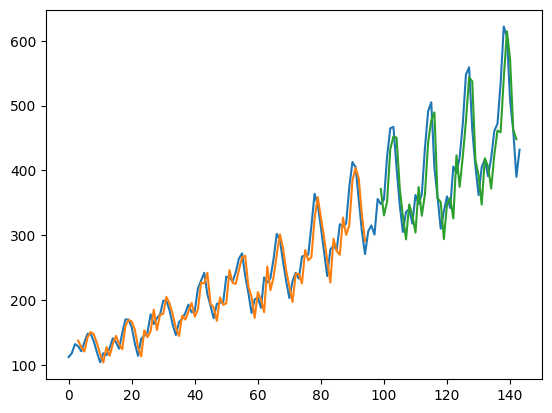

In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import os
import tensorflow as tf
#from tf.keras.models import Sequential
#from tf.keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# load the dataset
file_path = os.path.abspath('airline-passengers.csv')
#data = pd.read_csv(file_path, usecols=[1], engine='python')
dataframe = read_csv(file_path, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
#plt.plot(data)
#plt.plot(dataset)
#plt.show

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = tf.keras.models.Sequential()
#model = Sequential()
model.add(tf.keras.layers.Dense(12, input_shape=(look_back,), activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

O gráfico acima mostra as predições do modelo: Azul = conjunto de dados inteiro, Laranja = treinamento, Verde = previsões.

9. Procure na literatura 2 artigos que tratem do tema Sensores Inferenciais (ou Soft Sensors) para uma dada grandeza de seu interesse (e.g. temperatura, pressão, vazão, nível etc.) e que tenham sido publicados nos últimos 5 anos. Explique de forma sucinta o que foi desenvolvido pelos autores, referenciando-os. Sugestão: As principais informações de qualquer artigo geralmente se encontram no título, no resumo e nas conclusões. Ao ler esses três itens, o leitor tem uma boa ideia do que esperar daquele trabalho. A propósito, usualmente o leitor decidirá se lerá todo o artigo ou não com base na sua impressão a respeito desses três itens.

**Artigo 1: Data-driven soft sensors targeting heat pump systems** Autores: Yang Song, Davide Rolando, Javier Marchante Avellaneda, Gerhard Zucker, Hatef Madani [https://www.sciencedirect.com/science/article/pii/S0196890423001152](https://www.sciencedirect.com/science/article/pii/S0196890423001152)<br>

Neste trabalho, os autores (Yang Song, Davide Rolando, Javier Marchante Avellaneda, Gerhard Zucker e Hatef Madani) desenvolveram Sensores Inferenciais (soft sensors) baseados em dados para compensar informações ausentes em sistemas de bombas de calor. 
Os soft sensors foram desenvolvidos usando um modelo de rede neural artificial (ANN), um modelo de regressão polinomial multivariado integrado e um modelo empírico, levando em consideração diferentes restrições, como disponibilidade de dados e informações durante o processo de estabelecimento do modelo. Os três modelos foram validados com dados de uma instalação de teste de campo e mostraram bom desempenho para todas as variáveis compensadas (taxa de fluxo de massa de refrigeração, sensores de pressão e potência do compressor), conforme tabela abaixo. 


![Tabela 1](tabela1-artigo1.PNG)

![Tabela 2](tabela2-artigo1.PNG)

![Tabela 3](tabela3-artigo1.PNG)

![Tabela 5](tabela5-artigo1.PNG)

![Tabela 6](tabela6-artigo1.PNG)

![Tabela 7](tabela7-artigo1.PNG)

O modelo ANN foi o mais preciso, mas requer mais recursos adicionais para coletar dados de treinamento. O modelo de regressão polinomial multivariado integrado mostrou excelente precisão para a maioria dos soft sensors com dados de subcomponentes do fabricante, sem custo adicional. O estudo demonstrou o potencial dos soft sensors para substituir sensores físicos caros e abrir oportunidades para serviços inovadores com dados de monitoramento incompletos.

![Tabela 9](tabela9-artigo1.PNG)

Isso inclui monitoramento do estado operacional da bomba de calor, previsão de consumo de energia e desenvolvimento de gêmeos digitais para gerenciamento avançado de energia.

**Artigo 2: Soft sensors design in a petrochemical process using an Evolutionary Algorithm** Autores: Gustavo A.P. de Morais, Bruno H.G. Barbosa, Danton D. Ferreira, Leonardo S. Paiva [https://www.sciencedirect.com/science/article/pii/S0263224119307778?casa_token=W1xOW-naRKQAAAAA:ca54pHuAFLQvtGevvFeadfFwkGNeuuUehYL-vBljSBrTC1FC-a4RqkWX6SQKp8PsAjJZPXwCdZ0](https://www.sciencedirect.com/science/article/pii/S0263224119307778?casa_token=W1xOW-naRKQAAAAA:ca54pHuAFLQvtGevvFeadfFwkGNeuuUehYL-vBljSBrTC1FC-a4RqkWX6SQKp8PsAjJZPXwCdZ0)<br>

Neste trabalho, os autores (Gustavo A.P. de Morais, Bruno H.G. Barbosa, Danton D. Ferreira e Leonardo S. Paiva) desenvolveram soft sensors para prever a pressão em poços de petróleo de águas profundas. Nestes ambientes, é crucial monitorar a pressão no fundo do poço para otimizar a produção de petróleo. O desafio é que os sensores reais localizados no leito do mar têm uma vida útil limitada devido às condições adversas, e a falta de informações precisas sobre a pressão pode afetar a produção de petróleo.<br>
Para abordar esse problema, os autores propuseram um algoritmo chamado "Evolutionary Algorithm with Numerical Differentiation (EAND)" para projetar soft sensors capazes de prever a pressão no fundo do poço. Eles compararam o desempenho do EAND com outros algoritmos de otimização em problemas de otimização simulados para validar sua eficiência. O EAND mostrou convergência rápida e estabilidade. Além disso, os autores usaram o EAND para otimizar os soft sensors propostos para estimar a pressão no fundo do poço em cinco poços reais. O EAND foi comparado com outros métodos de projeto de soft sensors e mostrou a capacidade de encontrar automaticamente os melhores modelos de entrada para os soft sensors, tornando-o uma ferramenta valiosa, dada a complexidade das características dos poços de petróleo. Eles também testaram três modelos diferentes para construir modelos de conjunto, e o Random Forest obteve os melhores resultados em termos de erro percentual médio absoluto (MAPE).<br>
Os resultados obtidos mostraram que os soft sensors desenvolvidos com o EAND têm uma precisão muito alta na previsão da pressão no fundo do poço, com erros muito baixos (de 0,1453% a 0,788%). Isso demonstra a eficácia tanto do algoritmo quanto dos modelos de soft sensor propostos.<br>
O trabalho dos autores é significativo, pois propõe uma solução inovadora para um problema crítico na indústria de petróleo e gás. Ao desenvolver soft sensors eficazes e introduzir um algoritmo adaptativo como o EAND, eles possibilitaram a criação de sistemas de monitoramento mais robustos e confiáveis para a pressão no fundo do poço. Isso pode levar a uma produção mais eficiente de petróleo e uma melhor gestão dos recursos em poços submarinos, reduzindo a necessidade de substituição frequente de sensores físicos.